In [ ]:
# look into bubble algorithm

import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import numpy as np
import pandas as pd

fiveByFive = np.array([
    [131,673,234,103,18],
    [201,96,342,965,150],
    [630,803,746,422,111],
    [537,699,497,121,956],
    [805,732,524,37,331]
])

eightyByEighty = pd.DataFrame(pd.read_csv('p082_matrix.txt',header=None)).values

distances = {}
nodes = []

matrix = eightyByEighty

for i, row in enumerate(matrix):
    for j, col in enumerate(row):
        # top left corner only
        if i == 0 and j == 0:
            distances.update({
                (i,j):{
                    (i+1,j): {'weight': matrix[i+1,j]},
                    (i,j+1): {'weight': matrix[i,j+1]}
                }
            })
        # top row only, not last column
        elif i == 0 and j != len(matrix)-1:
            distances.update({
                (i,j):{
                    (i+1,j): {'weight': matrix[i+1,j]}, # down
                    (i,j+1): {'weight': matrix[i,j+1]}, # right
                }
            })
        # not top or bottom row, not last column
        elif i != 0 and i!= len(matrix)-1 and j != len(matrix)-1 :
            distances.update({
                (i,j):{
                    (i+1,j): {'weight': matrix[i+1,j]}, # down
                    (i,j+1): {'weight': matrix[i,j+1]}, # right
                    (i-1,j): {'weight': matrix[i-1,j]}, # up
                }
            })
        # last column only, not last row or first row
        elif i != len(matrix)-1 and i != 0 and j == len(matrix)-1:
            distances.update({
                (i,j):{
                    (i+1,j): {'weight': matrix[i+1,j]}, # down
                    (i-1,j): {'weight': matrix[i-1,j]}, # up
                }
            })
        elif i == len(matrix)-1 and j != len(matrix)-1:
            distances.update({
                (i,j):{
                    (i-1,j): {'weight': matrix[i-1,j]}, # up
                    (i,j+1): {'weight': matrix[i,j+1]}, # right
                }
            })
        elif i == 0 and j == len(matrix)-1:
            distances.update({
                (i,j):{
                    (i+1,j): {'weight': matrix[i+1,j]}, # down
                }
            })



G = nx.DiGraph(distances)
# for node in sorted(G.nodes):
#     print node, list(G.neighbors(node))

totals = []
for i in range(len(matrix)):
    for j in range(len(matrix)):
        try:
            path = nx.dijkstra_path(G, (i,0), (j,len(matrix)-1))

            path_total = matrix[(0,0)]
            for k in range(len(path)-1):
                path_total += G[path[k]][path[k+1]]['weight']

#             print path
#             print path_total
            totals.append(path_total)
        except:
            pass
#             print (0,i), ' to ', (4,j), ' failed'

print totals
print min(totals)
G = nx.Graph(distances, weight=False)

nx.draw(G, with_labels=True)

[274465, 281838, 288076, 283619, 281432, 277532, 278457, 284193, 276605, 279382, 273223, 271826, 272826, 275559, 268887, 270982, 278841, 274446, 278732, 278848, 282407, 281014, 283637, 291252, 293855, 299121, 300874, 303374, 310544, 308081, 307734, 306995, 302726, 302002, 305875, 308393, 306775, 303494, 310159, 312215, 320304, 326477, 324227, 324018, 325325, 332245, 333470, 334446, 339878, 342135, 350126, 349037, 352002, 352244, 346636, 343894, 350301, 352488, 355154, 360383, 368639, 369796, 373105, 371021, 372036, 376441, 383032, 387512, 394139, 400640, 400483, 397950, 402308, 399187, 408101, 411743, 417657, 418341, 419949, 425547, 273369, 280742, 286980, 282523, 280336, 276436, 277361, 283097, 275509, 278286, 272127, 270730, 271730, 274463, 267791, 269886, 277745, 273350, 277636, 277752, 281311, 279918, 282541, 290156, 292759, 298025, 299778, 302278, 309448, 306985, 306638, 305899, 301630, 300906, 304779, 307297, 305679, 302398, 309063, 311119, 319208, 325381, 323131, 322922, 324229,

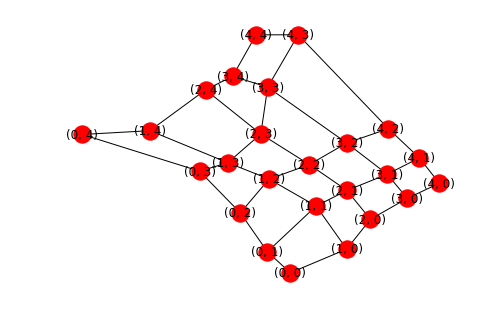

In [7]:
G = nx.Graph(distances, weights=False)

nx.draw(G, with_labels=True)